In [4]:
##############################################
### You can't analyze what you can't access ##
### import excel files      ##################
##############################################
import pandas as pd
import matplotlib.pyplot as plt

# Read spreadsheet and assign it to survey_responses
survey_responses = pd.read_excel("fcc_survey.xlsx")
# View the head of the dataframe
#print(survey_responses.head())


# Create string of lettered columns to load
col_string = "AD, AW:BA"
# Load data with skiprows and usecols set
survey_responses = pd.read_excel("fcc-new-coder-survey.xlsx", 
                        skiprows=2, 
                        usecols=col_string)
# View the names of the columns selected
print(survey_responses.columns)
#If the table of data from a sheet has multiple tables on it, 
#use skiprows, nrows, and usecols together to delineate which cells of data to read in.


Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


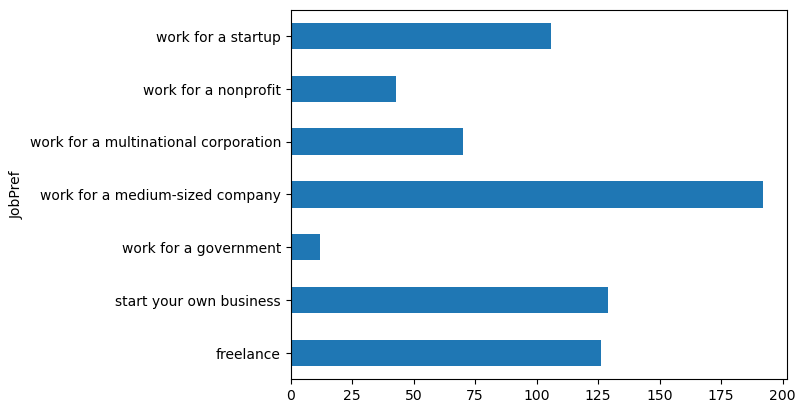

<class 'dict'>
dict_keys([0, '2017'])
dict_keys(['2016', '2017'])
Adding 1000 rows
Adding 1000 rows


/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_50776/2034481833.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_responses = all_responses.append(df)


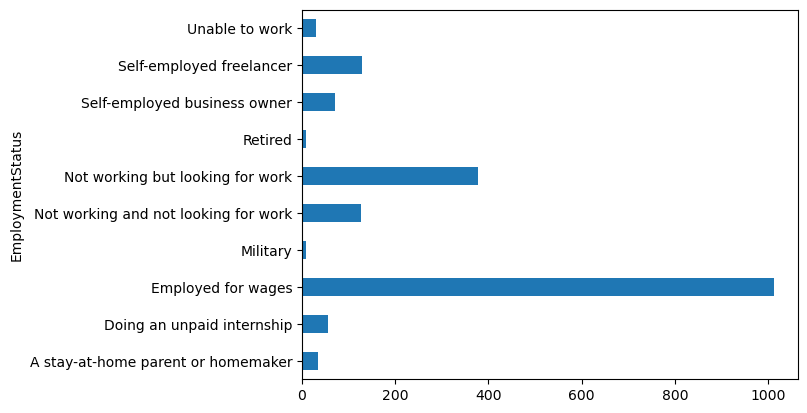

In [8]:
##############################################
### Select a single sheet/multiple sheets  ###
##############################################
# We have sheets for different years, 2016 and 2017.
#read_excel() loads only the first sheet by default.

# Create df from second worksheet by referencing its position
responses_2017 = pd.read_excel("fcc_survey.xlsx",
                               sheet_name=1)

# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

#It's possible to get multiple spreadsheets in an Excel file with one call to read_excel(), 
#Use multiple calls if sheets contain very different data or layouts, 
#To be able to customize other arguments for each sheet.

# Load both the 2016 and 2017 sheets by name
all_survey_data = pd.read_excel("fcc_survey.xlsx",
                                sheet_name=['2016', '2017'])
# View the data type of all_survey_data
print(type(all_survey_data))

# Load all sheets in the Excel file
all_survey_data = pd.read_excel("fcc_survey.xlsx",
                                sheet_name=[0,'2017'])
# View the sheet names in all_survey_data
print(all_survey_data.keys())

# Load all sheets in the Excel file
responses = pd.read_excel("fcc_survey.xlsx",
                                sheet_name=None)
# View the sheet names in all_survey_data
print(responses.keys())
# Create an empty dataframe
all_responses = pd.DataFrame()
# Set up for loop to iterate through values in responses
for df in responses.values():
  # Print the number of rows being added
  print("Adding {} rows".format(df.shape[0]))
  # Append df to all_responses, assign result
  all_responses = all_responses.append(df)
# Graph employment statuses in sample
counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
counts.plot.barh()
plt.show()

#This method works well when you know your spreadsheets use the same column names. 
#If they don't, you can end up with lots of NA values where column names don't align.


In [32]:
##############################################
### Set Boolean columns                    ###
##############################################
#Datasets may have columns that are most accurately modeled as Boolean values. 
#However, pandas usually loads these as floats by default, 
#But Pandas turns NA values into Trues.
#And yes/No in all True
#0,1 ok

bootcamp_data=pd.read_excel("fcc_survey.xlsx",usecols=["ID.x","AttendedBootcamp"])
print(bootcamp_data.dtypes)
#True/False are loaded as Float
print(bootcamp_data.sum())
# Count NA values in each column
print(bootcamp_data.isna().sum())
#if columns have no NA values they can be set as Boolean with dtypes argument

print(bootcamp_data.head())
#bool_data=pd.read_excel("fcc_survey.xlsx",usecols=["ID.x","AttendedBootcamp"],dtype={"AttendedBootcamp":bool})
#print(bool_data.dtypes)
#print(bool_data.groupby("AttendedBootcamp").sum())

#Modeling True/False data as Booleans is a good idea only without missing data
#If you want to make a column with NA values =>Boolean, 
#load the data, impute missing values, then re-cast the column as Boolean.


# Load file with Yes as a True value and No as a False value
survey_subset = pd.read_excel("fcc_survey.xlsx",usecols=["ID.x","AttendedBootcamp"],
                              dtype={"AttendedBootCamp": bool},
                              true_values=['Yes'],
                              false_values=['No'])
print(survey_subset.head())
print(survey_subset.dtypes)
print(survey_subset.isna().sum())


AttendedBootcamp    float64
ID.x                 object
dtype: object
AttendedBootcamp                                                 37.0
ID.x                cef35615d61b202f1dc794ef2746df14323e5a113644d1...
dtype: object
AttendedBootcamp    6
ID.x                0
dtype: int64
   AttendedBootcamp                              ID.x
0               0.0  cef35615d61b202f1dc794ef2746df14
1               0.0  323e5a113644d18185c743c241407754
2               0.0  b29a1027e5cd062e654a63764157461d
3               0.0  04a11e4bcb573a1261eb0d9948d32637
4               0.0  9368291c93d5d5f5c8cdb1a575e18bec
   AttendedBootcamp                              ID.x
0               0.0  cef35615d61b202f1dc794ef2746df14
1               0.0  323e5a113644d18185c743c241407754
2               0.0  b29a1027e5cd062e654a63764157461d
3               0.0  04a11e4bcb573a1261eb0d9948d32637
4               0.0  9368291c93d5d5f5c8cdb1a575e18bec
AttendedBootcamp    float64
ID.x                 object
dtype: object
A

In [34]:
##############################################
### Parse simple dates                     ###
##############################################
#pandas does not infer that columns contain datetime data 
#it interprets them as object or string data unless told otherwise.
#when they are in a standard format, we can use the parse_dates argument to tell read_excel() 
#to read columns as datetime data.

# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel("fcc_survey.xlsx",
                            parse_dates=["Part1StartTime"])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())
print(survey_data.Part1StartTime.dtypes)

#pandas can automatically parse many common date and time formats. 
#It can even parse standalone times, without dates, but the parsed times will have the date the code was run.


0   2016-03-29 21:23:13
1   2016-03-29 21:24:59
2   2016-03-29 21:25:37
3   2016-03-29 21:21:37
4   2016-03-29 21:26:22
Name: Part1StartTime, dtype: datetime64[ns]
datetime64[ns]


In [40]:
##############################################
### Get datetimes from multiple columns    ###
##############################################

#Sometimes, datetime data is split across columns. 
#A dataset might have a date and a time column, or a date may be split into year, month, and day columns.
# Create dict of columns to combine into new datetime column
datetime_cols = {"Part1Start": ["Part1StartTime","Part1StartTime"]}


# Load file, supplying the dict to parse_dates
survey_data = pd.read_excel("fcc_survey.xlsx",
                            parse_dates=datetime_cols)

# View summary statistics about Part2Start
print(survey_data.Part1Start.describe())

#the keys in a dictionary passed to parse_dates cannot be names of columns already in the dataframe. 
#Also, when combining columns to parse, their order in the list does not matter.


count                                        1000
unique                                        991
top       2016-03-30 01:27:09 2016-03-30 01:27:09
freq                                            2
Name: Part1Start, dtype: object


In [57]:
##############################################
### Parse non-standard date formats        ###
##############################################
#if a date is in a non-standard format, like 19991231 for December 31, 1999, 
#it can't be parsed at the import stage. 
#use pd.to_datetime() to convert strings to dates after import.

survey_datadt = pd.read_excel("fcc_survey.xlsx")
print(survey_datadt["Part1StartTime"].dtypes)
#print(survey_datadt["Part1StartTime"].head())

# Parse datetimes and assign result back to Part2EndTime
survey_datadt["Part1StartTime"] = pd.to_datetime(survey_datadt["Part1StartTime"], format="%Y-%m-%d")
  
print(survey_datadt["Part1StartTime"].dtypes)

    
#Datetime information comes in a variety of formats, 
#and parse them allows perform time-specific operations like calculating intervals.


object
datetime64[ns]
